In [1]:
from pysr import PySRRegressor
#import simpy as sp
import os
import yaml
import numpy as np

import json


#PATH = '/home/jpierre/v2/pySr/data/mod1/data.json'
#PATH_CFG = '/master/code/experimental/pysr/cfg_pysr'
PATH = '/home/jpierre/v2/pySr/data/normal/normal_action-None_dropout0_l1-0-lim2.json'

NB_RUN = 500
BINARY_OP = ["+", "*", 'cond']
UNARY_OP = ["inv(x) = 1/x"]
VARIABLES = ['v_x_0', 'v_y_0', 'v_x_1', 'v_y_1', 'v_x_2', 'v_y_2', 'v_x_3', 'v_y_3', 'd', 'delta_x', 'delta_y', 'r_i', 'r_j']
MAX_SIZE = 13
PARSIMONY = 0.0000032



def readJson(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def writeJson(data, filePath):
    """
    Function to write json 
    """
    with open(filePath, 'w') as f:
        json.dump(data, f, indent=2)


def getData(jsonPath = PATH):
    # for now


    messages = np.array(readJson(jsonPath)['messages'])
    edges = np.array(readJson(jsonPath)['edges'])[:, :3]

    return edges, messages



def getPySrModel(nbRun = NB_RUN, binaryOp = BINARY_OP, unaryOp = UNARY_OP, maxsize = MAX_SIZE):

    model = PySRRegressor(
        niterations=nbRun,
        binary_operators=binaryOp,
        #unary_operators= ["inv(x) = 1/x",],
        #populations=15,
        model_selection = "best",
        maxsize = maxsize,
        #complexity_of_variables = 2,
        #parsimony = PARSIMONY,
        #nested_constraints = {"cond": {"*":0}},
        #adaptive_parsimony_scaling = 1000,
        #ncycles_per_iteration = 1000,
        #turbo = True,
        #extra_sympy_mappings = {"inv": lambda x: 1 / x}
        #elementwise_loss = 'L1DistLoss()',
        weight_optimize = 0.001
    )

    return model


def fittingModel(model, X, y, verbose:bool = False, variables = VARIABLES):

    if verbose:
        print(">>>>> Fitting pySr")


    # Fit model
    model.fit(X, y, 
    variable_names = variables,
    # X_units = [""],
    # y_units = "",
    complexity_of_variables = [1, 3, 3]
    )


    return model

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
X, Y = getData()

In [3]:
print(X.shape)
print(Y.shape)

print(np.min(X[:, 0]))
print(np.max(X[:, 0]))

(2738, 3)
(2738, 2)
3.100050449371338
3.8994617462158203


In [4]:
print(np.min(Y))
print(np.max(Y))

-0.027188681066036224
0.02760261297225952


In [5]:
#Y = 1000 * Y

#Y = 1000000 * Y

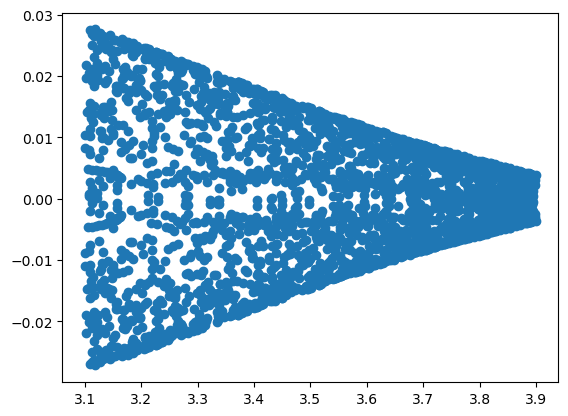

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], Y[:, 0])
plt.show()

In [7]:
pyReg = getPySrModel()

mod = fittingModel(pyReg, X, Y, variables=[' r ', ' cosine ', ' sine '])

/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/jpierre/anaconda3/envs/myenvPy/lib/python3.9/site-packages/pysr/sr.py:1441: UserWarning: Spaces in `variable_names` are not supported. Spaces have been replaced with underscores. 
Please use valid names instead.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 3.990e+04
Head worker occupation: 16.4%
Progress: 111 / 15000 total iterations (0.740%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           1.221e-04  5.314e+00  y₀ = cond(0.85175, 3.0104e-05)
5           3.230e-05  6.648e-01  y₀ = 0.013712 * _cosine_
9           3.210e-05  1.554e-03  y₀ = 0.013096 * ((0.54482 * 0.0042166) + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           1.267e-04  5.314e+00  y₁ = 0.015463 * 0.00587
5           3.425e-05  6.541e-01  y₁ = _sine_ * 0.013947
11          3.386e-05  1.892e-03  y₁ = (_sine_ * 0.0074433) * (1.9504 + (-0.045744 * 


Expressions evaluated per second: 6.530e+04
Head worker occupation: 17.1%
Progress: 868 / 15000 total iterations (5.787%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.162e-02  1.594e+01  y₀ = -0.1466
3           1.221e-04  2.588e+00  y₀ = cond(0.85175, 3.0104e-05)
5           3.210e-05  6.679e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
11          2.645e-05  4.836e-02  y₀ = 0.013095 * ((_sine_ * -0.2384) + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.305e-01  1.594e+01  y₁ = 0.48009
3           1.267e-04  3.753e+00  y₁


Expressions evaluated per second: 6.530e+04
Head worker occupation: 18.2%
Progress: 1606 / 15000 total iterations (10.707%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
11          2.640e-05  4.881e-02  y₀ = 0.013096 * ((_sine_ * -0.25466) + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.927e-02  1.594e+01  y₁ = -0.17063
3           1.267e-04  2.721e+00  y₁ = 0.015463 * 0.00587
5           3.425e-05  6.541e-01  y₁

Head worker occupation: 18.9%
Progress: 2814 / 15000 total iterations (18.760%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
11          2.634e-05  4.944e-02  y₀ = 0.013434 * ((-0.26044 * _sine_) + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.927e-02  1.594e+01  y₁ = -0.17063
3           1.267e-04  2.721e+00  y₁ = 0.015463 * 0.00587
5           3.425e-05  6.541e-01  y₁ = _sine_ * 0.013947
7           3.424e-05  1


Expressions evaluated per second: 6.690e+04
Head worker occupation: 20.6%
Progress: 3726 / 15000 total iterations (24.840%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
11          8.556e-06  3.305e-01  y₀ = ((-0.0036519 * 7.8835) * (-3.9888 + _r_)) * _cosine_
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.728e-02  1.594e+01  y₁ = -0.16469
3           1.267e-04  2.686e+00  y₁ = 0.015463 * 0.00587
5           3.425e-05  6.54


Expressions evaluated per second: 6.990e+04
Head worker occupation: 20.2%
Progress: 4515 / 15000 total iterations (30.100%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.728e-02  1.594e+01  y₁ = -0.16469
3    


Expressions evaluated per second: 6.290e+04
Head worker occupation: 20.0%
Progress: 5417 / 15000 total iterations (36.113%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.728e-02  1.594e+01  y₁ = -0.16469
3    


Expressions evaluated per second: 7.260e+04
Head worker occupation: 19.0%
Progress: 6371 / 15000 total iterations (42.473%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.728e-02  1.594e+01  y₁ = -0.16469
3    


Expressions evaluated per second: 7.240e+04
Head worker occupation: 19.0%
Progress: 7321 / 15000 total iterations (48.807%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5  


Expressions evaluated per second: 6.900e+04
Head worker occupation: 19.5%
Progress: 8277 / 15000 total iterations (55.180%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5  


Expressions evaluated per second: 5.950e+04
Head worker occupation: 19.8%
Progress: 9421 / 15000 total iterations (62.807%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5  


Expressions evaluated per second: 4.390e+04
Head worker occupation: 20.7%
Progress: 10077 / 15000 total iterations (67.180%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.470e+04
Head worker occupation: 21.6%
Progress: 10705 / 15000 total iterations (71.367%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.510e+04
Head worker occupation: 22.2%
Progress: 11238 / 15000 total iterations (74.920%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.470e+04
Head worker occupation: 22.4%
Progress: 11841 / 15000 total iterations (78.940%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.510e+04
Head worker occupation: 22.6%
Progress: 12367 / 15000 total iterations (82.447%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.490e+04
Head worker occupation: 23.5%
Progress: 12979 / 15000 total iterations (86.527%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.870e+04
Head worker occupation: 22.6%
Progress: 13531 / 15000 total iterations (90.207%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.530e+04
Head worker occupation: 22.4%
Progress: 14053 / 15000 total iterations (93.687%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 


Expressions evaluated per second: 4.280e+04
Head worker occupation: 24.4%
Progress: 14535 / 15000 total iterations (96.900%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.221e-04  1.594e+01  y₀ = 3.0102e-05
5           3.210e-05  3.340e-01  y₀ = _cosine_ * 0.013096
7           3.210e-05  1.416e-05  y₀ = 0.013095 * (0.0022913 + _cosine_)
9           8.556e-06  6.611e-01  y₀ = _cosine_ * ((_r_ * -0.02879) + 0.11484)
11          8.555e-06  6.393e-05  y₀ = ((_r_ * -0.02879) + 0.11484) * (0.0022913 + _cosine_)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.267e-04  1.594e+01  y₁ = 9.3206e-05
5 

In [8]:
print(mod.latex_table(indices=None, precision=3, columns=['equation', 'complexity', 'loss', 'score']))

\usepackage{breqn}
\usepackage{booktabs}

...

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y_{0} = 3.01 \cdot 10^{-5}$ & $1$ & $0.000122$ & $0.0$ \\
$y_{0} = _cosine_{} 0.0131$ & $5$ & $3.21 \cdot 10^{-5}$ & $0.334$ \\
$y_{0} = 0.0131 \left(_cosine_{} + 0.00229\right)$ & $7$ & $3.21 \cdot 10^{-5}$ & $1.42 \cdot 10^{-5}$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = _cosine_{} \left(0.115 + _r_{} \left(-0.0288\right)\right) \end{dmath*} \end{minipage} & $9$ & $8.56 \cdot 10^{-6}$ & $0.661$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \left(0.115 + _r_{} \left(-0.0288\right)\right) \left(_cosine_{} + 0.00229\right) \end{dmath*} \end{minipage} & $11$ & $8.56 \cdot 10^{-6}$ & $6.40 \cdot 10^{-5}$ \\
\bottomrule
\end{tabular}
\end{center}
\end{table}

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midru

In [9]:
print(mod.sympy())

[_cosine_*(0.11483563 + _r_*(-0.028789684)), _sine_*(0.12375834 - 0.031159509*_r_)]
